# Data Collection

### Importing Required Libraries
### `pandas`: For data manipulation and analysis.
### `numpy`: For numerical computations.
### `matplotlib.pyplot` & `seaborn`: For data visualization.
### `sklearn.preprocessing.StandardScaler`: To standardize features for consistent scaling.
### `sklearn.neighbors.NearestNeighbors`: To find similar songs based on feature distances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
# Here we are loading the dataset
df = pd.read_csv(r"C:\Users\rajee\Downloads\archive\data\data.csv")  

### Loading the Dataset
### - Loads the Spotify dataset from a CSV file (`data.csv`).
### - File path: Specific to the user's local system.
### - Contains 170,653 songs with 19 features like valence, danceability, etc.

In [3]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [45]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,category
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,Other
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,Relaxation/Yoga
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,Other
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,Other
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,Relaxation/Yoga


In [5]:
df.shape

(170653, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [7]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [8]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [9]:
# Here we a taking a simple of 5000 rows for analysis
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

In [10]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.5000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.9300,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.1570,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.9370,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.9950,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457


In [11]:
df.shape

(5000, 19)

In [12]:
print(f"Total tracks in sample: {len(df)}")
print(f"Columns available: {(df.columns.tolist())}")

Total tracks in sample: 5000
Columns available: ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo']


# Data Pre-Processing

In [13]:
# Here we a categorizing the track based on the 
# Features like acousticness,speechiness,etc
relaxation_category = (df["acousticness"] > 0.7) & (df["energy"] < 0.5) & (df["tempo"]>60) & (df["tempo"]<120)
devotional_category = (df["speechiness"] > 0.4) & (df["instrumentalness"] > 0.3)
other_category = ~(relaxation_category | devotional_category)

In [14]:
# Here we are adding new columns for Relaxation/Yoga,Devotional,Other
df.loc[relaxation_category, "category"] = "Relaxation/Yoga"
df.loc[devotional_category, "category"] = "Devotional"
df.loc[other_category, "category"] = "Other"

In [15]:
# Here we are showing the columns
print("\nCategories:")
df["category"]


Categories:


0                 Other
1       Relaxation/Yoga
2                 Other
3                 Other
4       Relaxation/Yoga
             ...       
4995              Other
4996              Other
4997              Other
4998    Relaxation/Yoga
4999              Other
Name: category, Length: 5000, dtype: object

## Visualization of the No.of Tracks in the Dataset

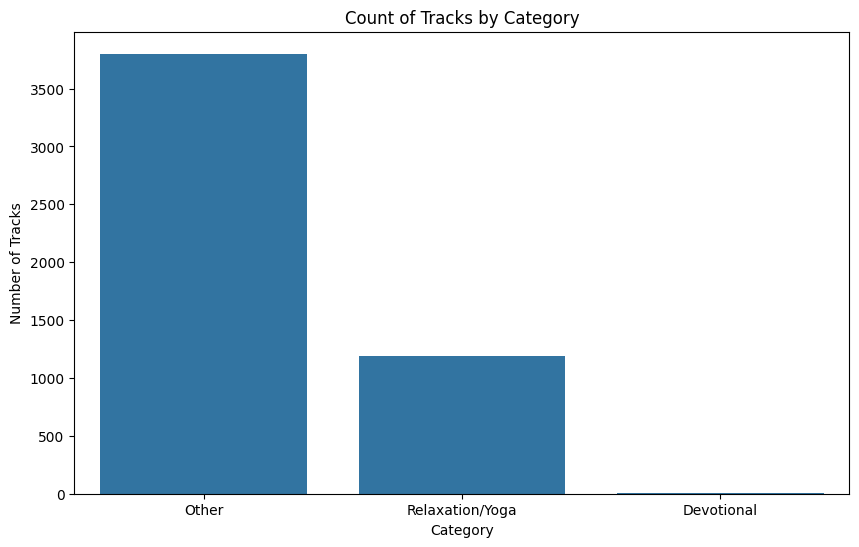

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x="category", data=df)
plt.title("Count of Tracks by Category")
plt.xlabel("Category")
plt.ylabel("Number of Tracks")
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           5000 non-null   float64
 1   year              5000 non-null   int64  
 2   acousticness      5000 non-null   float64
 3   artists           5000 non-null   object 
 4   danceability      5000 non-null   float64
 5   duration_ms       5000 non-null   int64  
 6   energy            5000 non-null   float64
 7   explicit          5000 non-null   int64  
 8   id                5000 non-null   object 
 9   instrumentalness  5000 non-null   float64
 10  key               5000 non-null   int64  
 11  liveness          5000 non-null   float64
 12  loudness          5000 non-null   float64
 13  mode              5000 non-null   int64  
 14  name              5000 non-null   object 
 15  popularity        5000 non-null   int64  
 16  release_date      5000 non-null   object 


# Here we are Filting data that has relaxation and devotional songs

In [18]:
df_filtered = df[df["category"] != "Other"].reset_index(drop=True)
print(f"\nFiltered dataset contains {len(df_filtered)} tracks that are yoga and devotional.")


Filtered dataset contains 1199 tracks that are yoga and devotional.


In [19]:
df_filtered

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,category
0,0.5830,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.1280,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,Relaxation/Yoga
1,0.4220,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.1120,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,Relaxation/Yoga
2,0.0806,1951,0.977,"['Giacomo Puccini', 'Giovanni Inghilleri', 'Re...",0.307,194573,0.0267,0,1LFJdyV9hCKHfCMO6Sp9wA,0.000000,5,0.1560,-24.962,1,Madama Butterfly / Act 2: Ora a noi. Sedete qui,0,1951-01-01,0.0802,76.894,Relaxation/Yoga
3,0.0581,1986,0.960,"['Cocteau Twins', 'Harold Budd']",0.205,455800,0.0257,0,5K5NG7aJtMgnu0a4FNP3Yv,0.945000,11,0.0936,-26.922,1,The Ghost Has No Home,34,1986-11-10,0.0395,112.679,Relaxation/Yoga
4,0.2220,1938,0.979,"['Wolfgang Amadeus Mozart', 'Lili Kraus', 'Wil...",0.279,523173,0.1270,0,4BPbUQtLjiuq8sJsAA4680,0.212000,3,0.1510,-23.180,1,"Trio No. 3 in B-Flat Major, K. 502: II. Larghetto",0,1938,0.0340,83.789,Relaxation/Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.2160,2015,0.988,"['Johann Pachelbel', 'Music Lab Collective', '...",0.407,288853,0.1220,0,1p8Po4X9rWvMOuGR2vhVI2,0.942000,2,0.1130,-17.925,1,"Canon in D Major, P.37",59,2015-03-01,0.0427,105.484,Relaxation/Yoga
1195,0.5240,1946,0.984,"['George Frideric Handel', 'The Liverpool Phil...",0.414,136573,0.3220,0,2rvJWYt7wWxRkuUG9ta5Sm,0.143000,0,0.1550,-14.864,0,"Messiah, HWV 56, Pt. 2: He trusted in God that...",0,1946,0.0391,118.516,Relaxation/Yoga
1196,0.7550,1962,0.785,['Johnny Cash'],0.847,141919,0.4690,0,5BajHw20mVuhFctclObcSa,0.000148,10,0.1090,-10.018,0,Train of Love,12,1962-12-03,0.0760,102.337,Relaxation/Yoga
1197,0.1480,1988,0.911,['Bernadette Peters'],0.365,123427,0.1410,0,2FnxOCX05Hujz2TahNVx5p,0.000000,5,0.1000,-11.944,1,Lament,27,1988,0.0358,88.232,Relaxation/Yoga


In [20]:
df_filtered.shape

(1199, 20)

In [21]:
df_filtered['category'].value_counts()

category
Relaxation/Yoga    1193
Devotional            6
Name: count, dtype: int64

In [22]:
df_filtered['category'].unique()

array(['Relaxation/Yoga', 'Devotional'], dtype=object)

In [23]:
Relaxation_Yoga_df = df_filtered[df_filtered['category'] == "Relaxation/Yoga"]
Relaxation_Yoga_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,category
0,0.5830,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.1280,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,Relaxation/Yoga
1,0.4220,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.1120,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,Relaxation/Yoga
2,0.0806,1951,0.977,"['Giacomo Puccini', 'Giovanni Inghilleri', 'Re...",0.307,194573,0.0267,0,1LFJdyV9hCKHfCMO6Sp9wA,0.000000,5,0.1560,-24.962,1,Madama Butterfly / Act 2: Ora a noi. Sedete qui,0,1951-01-01,0.0802,76.894,Relaxation/Yoga
3,0.0581,1986,0.960,"['Cocteau Twins', 'Harold Budd']",0.205,455800,0.0257,0,5K5NG7aJtMgnu0a4FNP3Yv,0.945000,11,0.0936,-26.922,1,The Ghost Has No Home,34,1986-11-10,0.0395,112.679,Relaxation/Yoga
4,0.2220,1938,0.979,"['Wolfgang Amadeus Mozart', 'Lili Kraus', 'Wil...",0.279,523173,0.1270,0,4BPbUQtLjiuq8sJsAA4680,0.212000,3,0.1510,-23.180,1,"Trio No. 3 in B-Flat Major, K. 502: II. Larghetto",0,1938,0.0340,83.789,Relaxation/Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.2160,2015,0.988,"['Johann Pachelbel', 'Music Lab Collective', '...",0.407,288853,0.1220,0,1p8Po4X9rWvMOuGR2vhVI2,0.942000,2,0.1130,-17.925,1,"Canon in D Major, P.37",59,2015-03-01,0.0427,105.484,Relaxation/Yoga
1195,0.5240,1946,0.984,"['George Frideric Handel', 'The Liverpool Phil...",0.414,136573,0.3220,0,2rvJWYt7wWxRkuUG9ta5Sm,0.143000,0,0.1550,-14.864,0,"Messiah, HWV 56, Pt. 2: He trusted in God that...",0,1946,0.0391,118.516,Relaxation/Yoga
1196,0.7550,1962,0.785,['Johnny Cash'],0.847,141919,0.4690,0,5BajHw20mVuhFctclObcSa,0.000148,10,0.1090,-10.018,0,Train of Love,12,1962-12-03,0.0760,102.337,Relaxation/Yoga
1197,0.1480,1988,0.911,['Bernadette Peters'],0.365,123427,0.1410,0,2FnxOCX05Hujz2TahNVx5p,0.000000,5,0.1000,-11.944,1,Lament,27,1988,0.0358,88.232,Relaxation/Yoga


In [24]:
devotional_df = df_filtered[df_filtered['category'] == "Devotional"]
devotional_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,category
284,0.606,1956,0.829,"['Wolfgang Amadeus Mozart', 'Wiener Philharmon...",0.397,251733,0.406,0,6xXeL1zUfOTZrwyOx1N01g,0.739,7,0.9350,-19.721,0,"Symphony No. 25 in G Minor, K. 183: IV. Allegr...",7,1956-01-01,0.447,117.452,Devotional
450,0.844,1943,0.973,"['Francisco Canaro', 'Carlos Roldán']",0.686,195960,0.428,0,6BwKr8DcWxhZhKUm4NHN6F,0.606,1,0.0833,-9.591,1,Se Dice de Mi... - Remasterizado,2,1943-03-12,0.424,88.601,Devotional
669,0.575,1998,0.996,['OutKast'],0.650,70280,0.467,1,6NqUceA124QO9v5jYv0QCg,0.703,5,0.5180,-15.310,1,Nathaniel,37,1998-09-29,0.631,101.221,Devotional
852,0.899,1926,0.995,['Louis Armstrong & His Hot Five'],0.614,189333,0.196,0,0jiH6Bf3OOm36ubMWZ0Sr5,0.892,4,0.0526,-14.019,1,Jazz Lips,9,1926,0.427,201.119,Devotional
1069,0.177,1950,0.994,['President Franklin Delano Roosevelt'],0.669,1601620,0.677,0,1OOOjuRfvzeTIC0t0KJ4ln,0.886,11,0.8130,-14.981,1,Fireside Chat #6 - On Government and Capitalis...,0,1950,0.926,102.354,Devotional
1087,0.826,1947,0.992,['Paro Devi'],0.635,237375,0.255,0,3a85zCBFsFlmIBz2U8nYGs,0.930,6,0.5000,-13.679,1,Ambuva Ki Dali Pe Koyal Bole,0,1947-01-01,0.406,105.218,Devotional


# EDA (Exploratory data analysis)

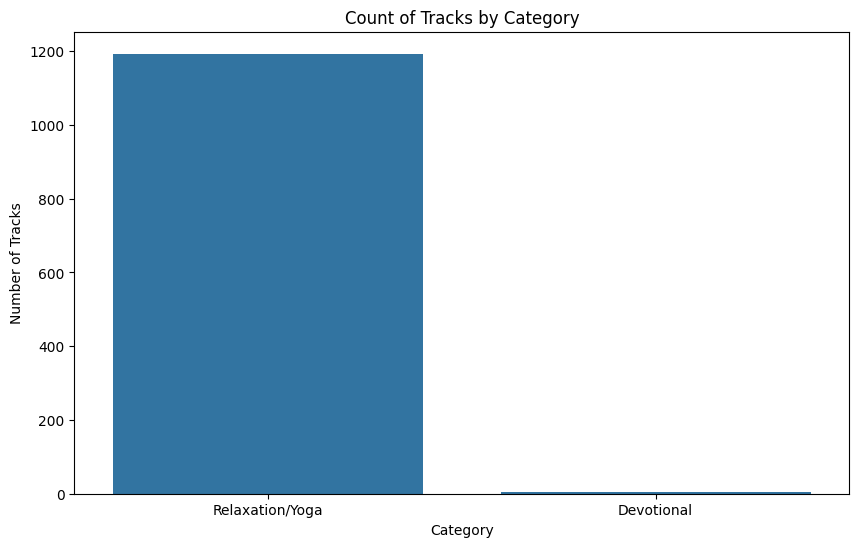

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x="category", data=df_filtered)
plt.title("Count of Tracks by Category")
plt.xlabel("Category")
plt.ylabel("Number of Tracks")
plt.show()

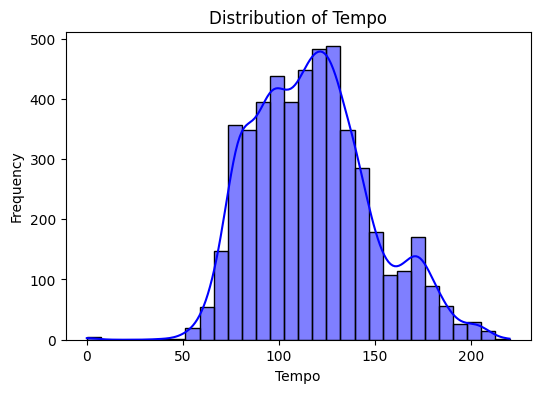

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(df["tempo"], kde=True, bins=30, color="blue")
plt.title("Distribution of Tempo")
plt.xlabel("Tempo")
plt.ylabel("Frequency")
plt.show()

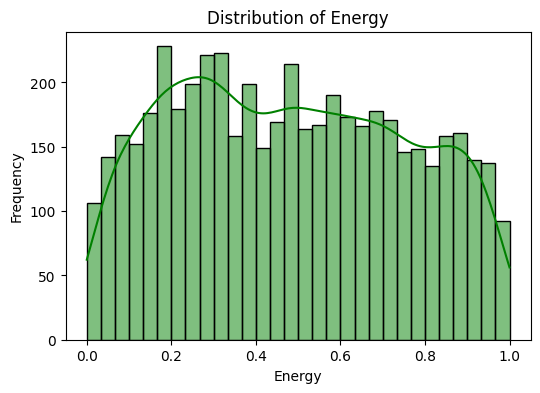

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df["energy"], kde=True, bins=30, color="green")
plt.title("Distribution of Energy")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

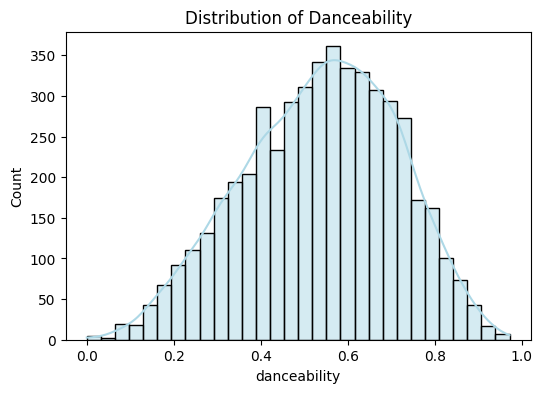

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(df["danceability"], kde=True, bins=30, color="lightblue")
plt.title("Distribution of Danceability")
plt.xlabel("danceability")
plt.ylabel("Count")
plt.show()

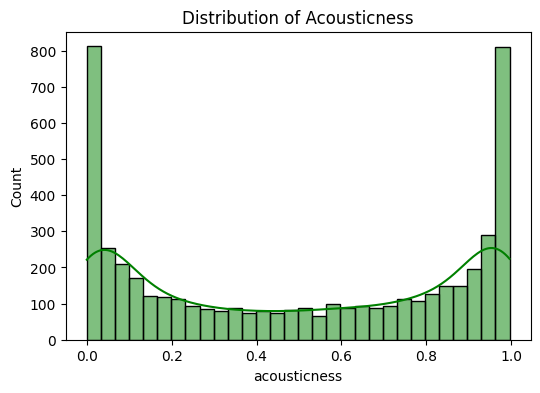

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(df["acousticness"], kde=True, bins=30, color="green")
plt.title("Distribution of Acousticness")
plt.xlabel("acousticness")
plt.ylabel("Count")
plt.show()

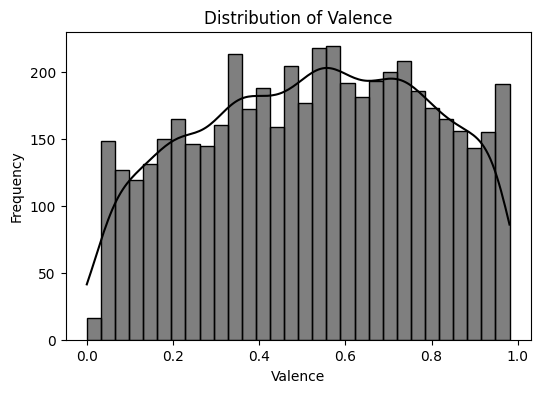

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df["valence"], kde=True, bins=30, color="black")
plt.title("Distribution of Valence")
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.show()

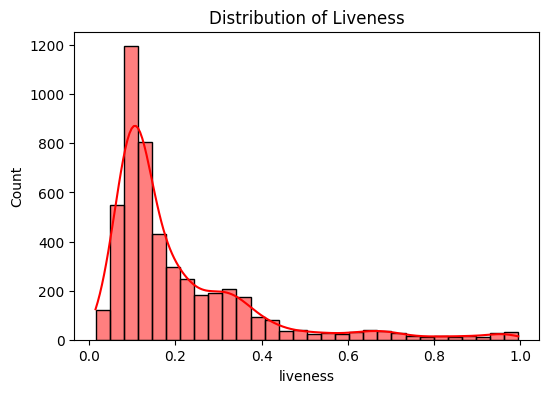

In [31]:
plt.figure(figsize=(6, 4))
sns.histplot(df["liveness"], kde=True, bins=30, color="red")
plt.title("Distribution of Liveness")
plt.xlabel("liveness")
plt.ylabel("Count")
plt.show()

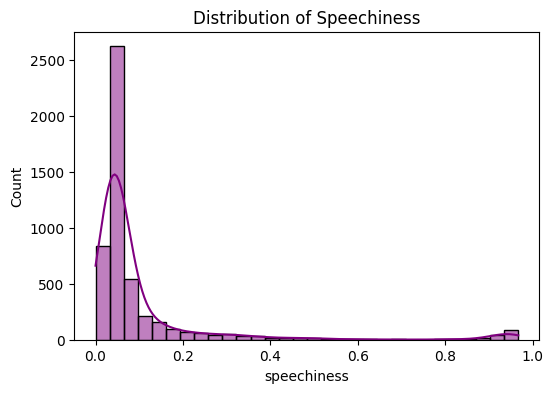

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df["speechiness"], kde=True, bins=30, color="purple")
plt.title("Distribution of Speechiness")
plt.xlabel("speechiness")
plt.ylabel("Count")
plt.show()

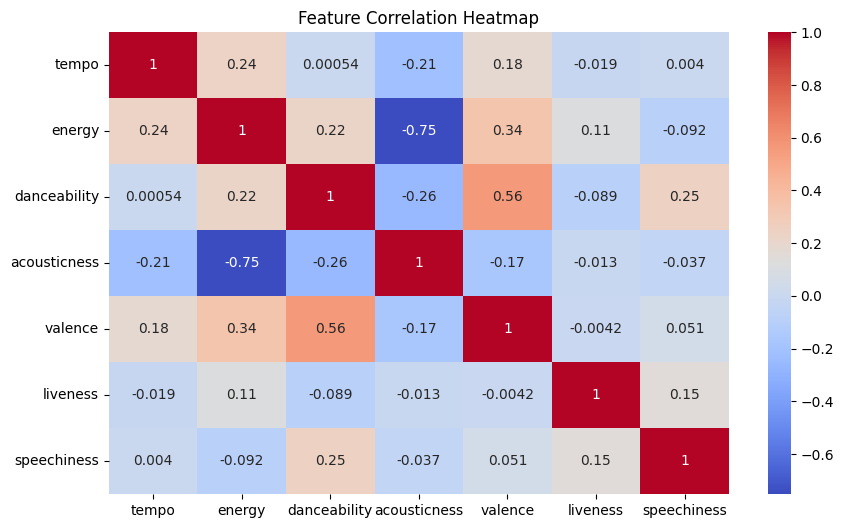

In [33]:
# Compute correlation matrix
correlation_matrix = df[["tempo", "energy", "danceability", "acousticness", "valence", "liveness", "speechiness"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

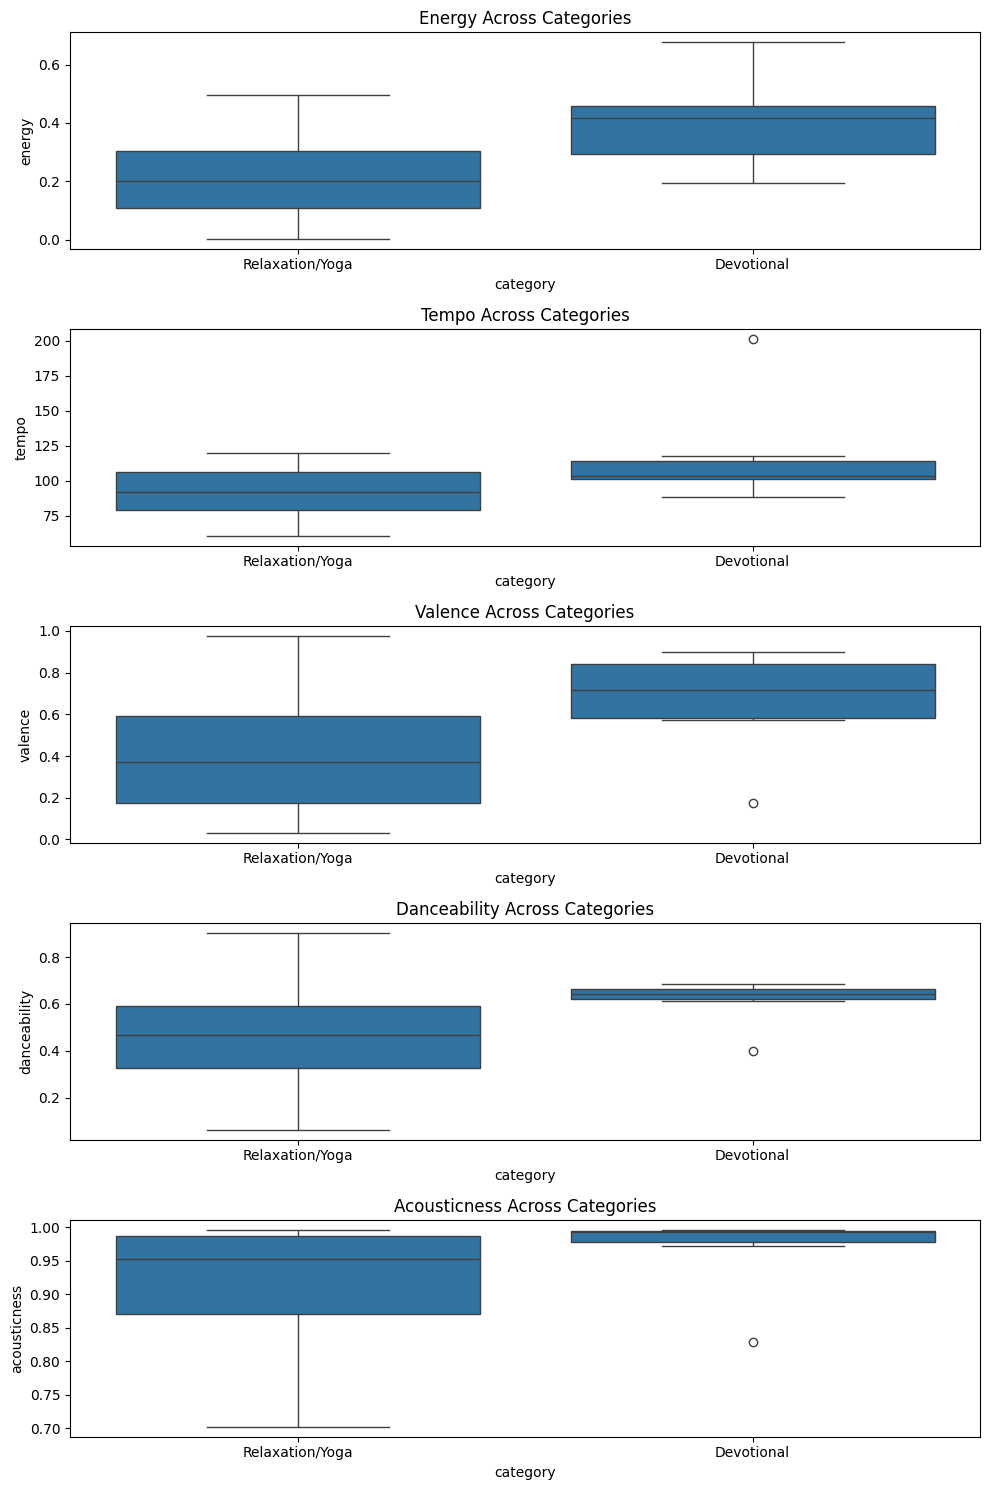

In [34]:
# Features to compare
features_to_compare = ["energy", "tempo", "valence", "danceability", "acousticness"]

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=1, figsize=(10, 15))

# Create boxplots
for i, feature in enumerate(features_to_compare):
    sns.boxplot(x="category", y=feature, data=df_filtered, ax=axes[i])
    axes[i].set_title(f"{feature.capitalize()} Across Categories")

plt.tight_layout()
plt.show()

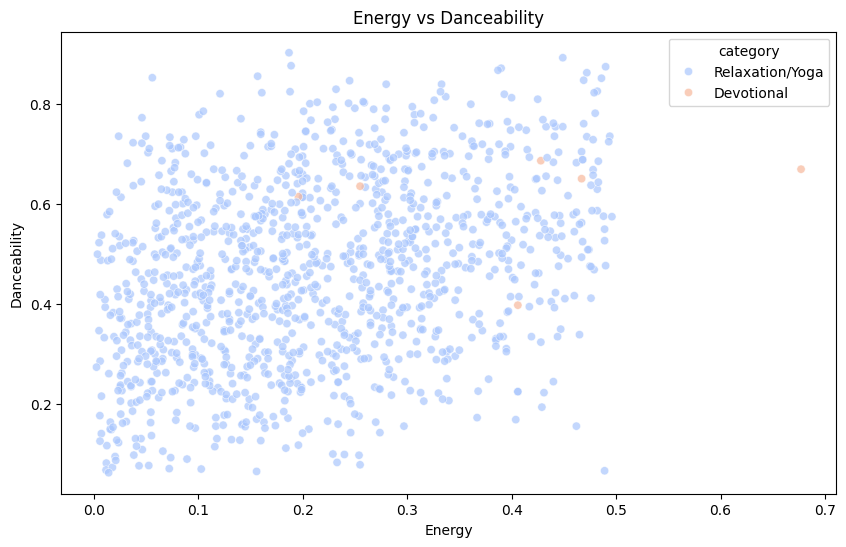

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="energy", y="danceability", hue="category", alpha=0.7, palette="coolwarm")
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()

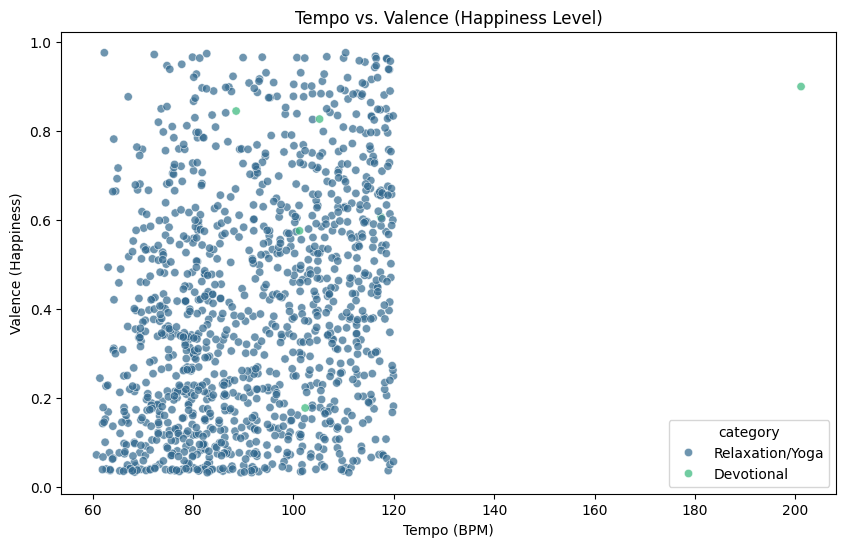

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="tempo", y="valence", hue="category", alpha=0.7, palette="viridis")
plt.title("Tempo vs. Valence (Happiness Level)")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Valence (Happiness)")
plt.show()

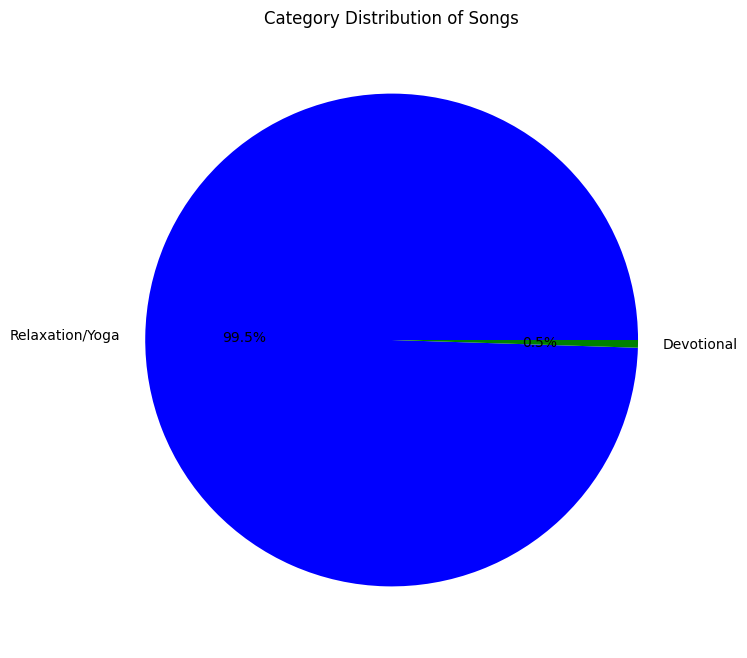

In [37]:
# Get category counts
category_counts = df_filtered["category"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=["blue", "green", "orange"])
plt.title("Category Distribution of Songs")
plt.show()

# Model Implementation

In [38]:
# Select numerical features for standardization
numerical_features = ["valence", "danceability", "energy", "tempo", "acousticness", "liveness", "speechiness", "instrumentalness"]

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered[numerical_features]), columns=numerical_features)

In [39]:
df_scaled

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,0.697606,0.672724,0.446260,-0.142197,0.126129,-0.453308,-0.058363,-0.531266
1,0.078053,1.021361,-0.902843,-1.247412,0.936371,-0.551045,0.094303,1.336648
2,-1.235707,-0.865705,-1.472203,-0.947663,0.711997,-0.282267,-0.058363,-0.825123
3,-1.322291,-1.430164,-1.480024,1.234291,0.500087,-0.663444,-0.308908,1.589621
4,-0.691578,-1.020655,-0.687768,-0.527248,0.736927,-0.312810,-0.342765,-0.283403
...,...,...,...,...,...,...,...,...
1194,-0.714667,-0.312313,-0.726873,0.795583,0.849115,-0.544937,-0.289209,1.581955
1195,0.470564,-0.273576,0.837304,1.590196,0.799253,-0.288376,-0.311370,-0.459718
1196,1.359488,2.122610,1.986974,0.603698,-1.681335,-0.569371,-0.084218,-0.824745
1197,-0.976342,-0.544738,-0.578276,-0.256340,-0.110711,-0.624349,-0.331684,-0.825123


In [40]:
# Initializing Nearest Neighbors model
neigh = NearestNeighbors(n_neighbors=6, metric='cosine')  # 6 includes the input song
neigh.fit(df_scaled)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [41]:
def get_recommendations(song_name, num_recommendations=5):
    # Find the song index
    song_idx = df_filtered[df_filtered["name"] == song_name].index

    if len(song_idx) == 0:
        print(f"Song '{song_name}' not found in the dataset.")
        return None

    song_idx = song_idx[0]
    
    # Get the song's features
    song_features = df_scaled.iloc[song_idx].values.reshape(1, -1)

    # Find nearest neighbors
    distances, indices = neigh.kneighbors(song_features)

    # Get recommended songs (excluding the input song)
    recommended_indices = indices[0][1:num_recommendations+1]

    # Display recommendations
    recommendations = df_filtered.iloc[recommended_indices][["name", "artists", "category"]]
    recommendations["similarity"] = 1 - distances[0][1:num_recommendations+1]

    return recommendations

In [42]:
if __name__ == "__main__":
    while True:
        user_input = input("\nEnter a song name for recommendations (or type 'exit' to quit): ").strip()

        if user_input.lower() == 'exit':
            print("Exiting recommendation system.")
            break

        recommendations = get_recommendations(user_input)

        if recommendations is not None:
            print("\nRecommended Songs:")
            print(recommendations)
        break


Enter a song name for recommendations (or type 'exit' to quit):  exit


Exiting recommendation system.


In [43]:
df_filtered

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,category
0,0.5830,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.1280,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,Relaxation/Yoga
1,0.4220,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.1120,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,Relaxation/Yoga
2,0.0806,1951,0.977,"['Giacomo Puccini', 'Giovanni Inghilleri', 'Re...",0.307,194573,0.0267,0,1LFJdyV9hCKHfCMO6Sp9wA,0.000000,5,0.1560,-24.962,1,Madama Butterfly / Act 2: Ora a noi. Sedete qui,0,1951-01-01,0.0802,76.894,Relaxation/Yoga
3,0.0581,1986,0.960,"['Cocteau Twins', 'Harold Budd']",0.205,455800,0.0257,0,5K5NG7aJtMgnu0a4FNP3Yv,0.945000,11,0.0936,-26.922,1,The Ghost Has No Home,34,1986-11-10,0.0395,112.679,Relaxation/Yoga
4,0.2220,1938,0.979,"['Wolfgang Amadeus Mozart', 'Lili Kraus', 'Wil...",0.279,523173,0.1270,0,4BPbUQtLjiuq8sJsAA4680,0.212000,3,0.1510,-23.180,1,"Trio No. 3 in B-Flat Major, K. 502: II. Larghetto",0,1938,0.0340,83.789,Relaxation/Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.2160,2015,0.988,"['Johann Pachelbel', 'Music Lab Collective', '...",0.407,288853,0.1220,0,1p8Po4X9rWvMOuGR2vhVI2,0.942000,2,0.1130,-17.925,1,"Canon in D Major, P.37",59,2015-03-01,0.0427,105.484,Relaxation/Yoga
1195,0.5240,1946,0.984,"['George Frideric Handel', 'The Liverpool Phil...",0.414,136573,0.3220,0,2rvJWYt7wWxRkuUG9ta5Sm,0.143000,0,0.1550,-14.864,0,"Messiah, HWV 56, Pt. 2: He trusted in God that...",0,1946,0.0391,118.516,Relaxation/Yoga
1196,0.7550,1962,0.785,['Johnny Cash'],0.847,141919,0.4690,0,5BajHw20mVuhFctclObcSa,0.000148,10,0.1090,-10.018,0,Train of Love,12,1962-12-03,0.0760,102.337,Relaxation/Yoga
1197,0.1480,1988,0.911,['Bernadette Peters'],0.365,123427,0.1410,0,2FnxOCX05Hujz2TahNVx5p,0.000000,5,0.1000,-11.944,1,Lament,27,1988,0.0358,88.232,Relaxation/Yoga
